## Практическая работа №7 Теория вероятностей и математическая статистика

#### Задание №1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])  # zp
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])  # ks

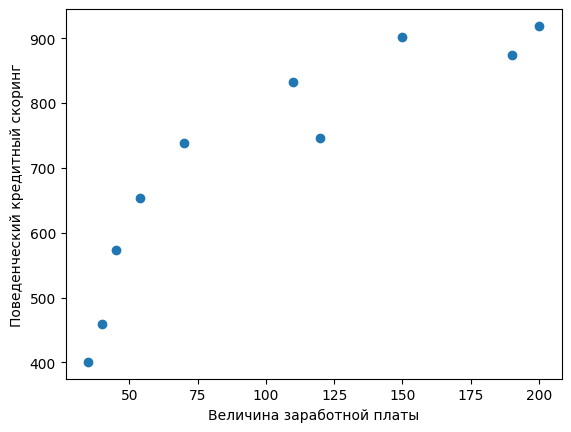

In [13]:
# График распределения
plt.scatter(X,y)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

Можно предположить что между X и y есть линейная зависимость, тогда эту связь можно описать формулой<br>
$y = a + b*X$, где<br>
a - интерсепт, величина которая показывает чему будет равен y, если независимая переменная b=0<br>
b - независимый коэфициент<br>
$a = \bar y - b \cdot \bar X$<br>
$b = \frac{\bar{Xy} - \bar X \cdot \bar y}{\bar{X^2} - {\bar X}^2}$



In [16]:
b = (np.mean(X*y) - np.mean(X) * np.mean(y))/(np.mean(X**2) - np.mean(X)**2)
a = np.mean(y) - b*np.mean(X)
print('b =', round(b,4))
print('a =', round(a,4))

b = 2.6205
a = 444.1774


$y = 444.1774 + 2.6205 \cdot x$<br>
Посмотрим на графике

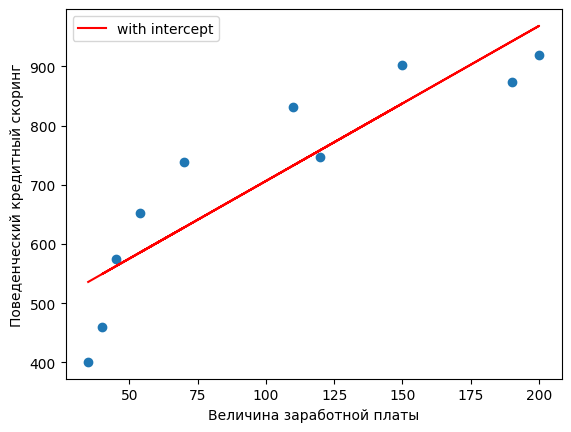

In [37]:
plt.scatter(X,y)
plt.plot(X, a+b*X, label='with intercept', c='red')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.legend()
plt.show()

так же коэфициенты a и b можно расчитать матричным методом
$\displaystyle \begin{pmatrix}y_1 \\ y_2 \\ \dots \\ y_n \end{pmatrix} = \begin{pmatrix}1 & x_1 \\ 1 & x_2 \\ \dots & \dots \\ 1 & x_n \end{pmatrix} \cdot \begin{pmatrix}a \\ b \end{pmatrix}$<br>
В некоторых случаях величиной интерсепта можно принебречь (и задача такая), тогда взаимосвязь будет описываться следующим выражением:<br>
$\displaystyle \begin{pmatrix}y_1 \\ y_2 \\ \dots \\ y_n \end{pmatrix} = \begin{pmatrix}x_1 \\ x_2 \\ \dots \\ x_n \end{pmatrix} \cdot b$

In [28]:
# Конвертируем массив в матрицу
X_mx = X.reshape((-1,1))
y_mx = y.reshape((-1,1))
# Найдём b
b2 = np.dot(np.linalg.inv(np.dot(X_mx.T, X_mx)), X_mx.T @ y_mx)
b2 = b2[0][0]
print('b =', round(b2,4))

b = 5.8898


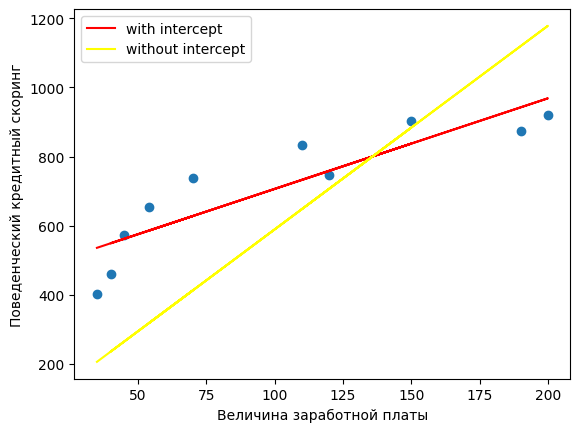

In [35]:
plt.scatter(X,y)
plt.plot(X, a+b*X, label='with intercept', c='red')
plt.plot(X, b2*X, label='without intercept', c='yellow')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.legend()
plt.show()

#### Задание №2
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?